In [1]:

import os
import sys
import IPython

import numpy as np
import pandas as pd

import time
import datetime

import collections
import matplotlib.cm as cm

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import HTML
from scipy.stats import linregress

import seaborn as sns
# seaborn maszkolás
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)]=True

from sklearn.preprocessing import binarize
import missingno as msgno

import matplotlib
import matplotlib.pyplot as plt
# egyedi figure size
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# általános figure size
width = 20
height = 20

plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams.update({'font.size': 38})

#from chart_studio import plotly
import missingno as msgno

%matplotlib inline
import statsmodels
#import cufflinks as cf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

#import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plotly.offline.init_notebook_mode()
#init_notebook_mode(connected=True)
#cf.go_offline()

print("Jupyter notebook: {}" .format(IPython.__version__))
print("Python: {}" .format(sys.version))
print("Numpy: {}" .format(np.__version__))
print("Pandas: {}" .format(pd.__version__))
print("Matplotlib: {}" .format(matplotlib.__version__))
print("Seaborn: {}" .format(sns.__version__))
print("sklearn: {}" .format(sklearn.__version__))
print("statsmodels: {}" .format(statsmodels.__version__))
#print("Plotly version: {}".format(plotly.__version__))


Jupyter notebook: 7.9.0
Python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.17.3
Pandas: 0.25.3
Matplotlib: 3.1.2
Seaborn: 0.9.0
sklearn: 0.21.3
statsmodels: 0.10.1


***

**Loading the file**

In [2]:
os.chdir("C:\\Lori\\Suli\\Szemeszter_2\\Data_Analysis_3\\DA3-A2-BISNODE")

In [3]:
df=pd.read_csv("cs_bisnode_panel.csv")

In [4]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


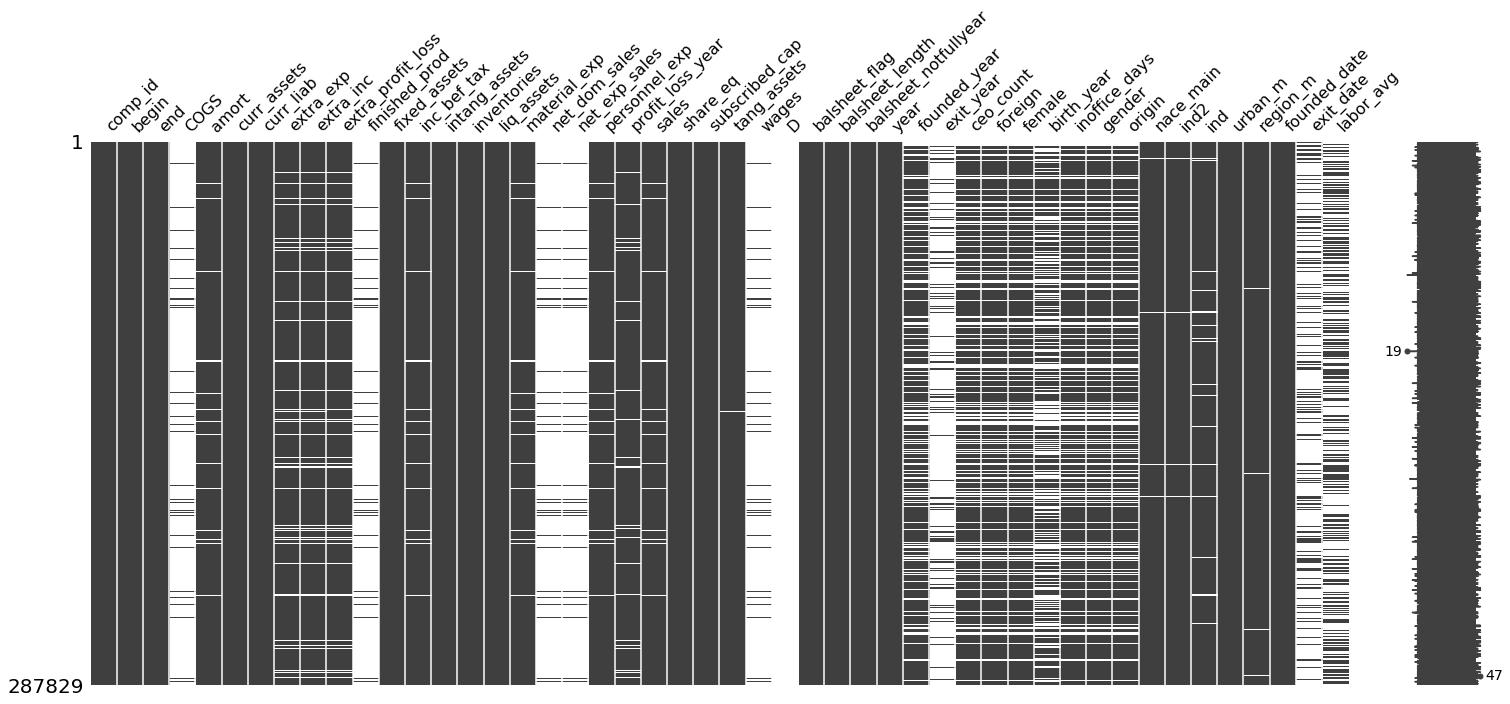

In [5]:
msgno.matrix(df)

In [6]:
df.duplicated().sum()

0

Having a look at the columns which have a missing data ratio of over 30%.

In [7]:
null_values_dict ={}
for cols in df.columns:
    null_values_dict.update({cols:df[cols].isnull().sum()/df.shape[0]})
null_vals = pd.DataFrame.from_dict(null_values_dict, orient='index').rename(columns={0:"null_value_perc"})
null_vals.query("null_value_perc>0.3").sort_values("null_value_perc",ascending=False)

,null_value_perc
D,1.000000
finished_prod,0.939252
wages,0.937522
COGS,0.936570
net_dom_sales,0.936570
net_exp_sales,0.936570
exit_year,0.864993
exit_date,0.804815
labor_avg,0.509094
birth_year,0.388488


Parsing the date columns to be recognized as date format.

In [8]:
df["begin"] = pd.to_datetime(df["begin"], format="%Y-%M-%d")
df["end"] = pd.to_datetime(df["end"], format="%Y-%M-%d")

Adding a new column showing only the year.

In [9]:
df["begin_year"]=df.begin.dt.year

Checking if the yearly data is missing in a regular or a random fashion for every column.

In [10]:
begin_years_cols = list(df.begin_year.unique())
df_cols = list(df.columns)

my_list=list()

for year in begin_years_cols:
    for col in df_cols:
        my_df = df.query("begin_year==year")
        nan_perc = my_df[col].isnull().sum() / my_df.shape[0]
        my_list.append([year,col,nan_perc])

In [11]:
new_df = pd.DataFrame(my_list, columns=["year", "column", "percentage"])

In [12]:
new_df.pivot(index="year", columns="column", values="percentage")

column,COGS,D,amort,balsheet_flag,balsheet_length,balsheet_notfullyear,begin,begin_year,birth_year,ceo_count,...,personnel_exp,profit_loss_year,region_m,sales,share_eq,subscribed_cap,tang_assets,urban_m,wages,year
year,,,,,,,,,,,,,,,,,,,,,
2005,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2006,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2007,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2008,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2009,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2010,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2011,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2012,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0
2013,0.936564,1.0,0.027932,0.0,0.0,0.0,0.0,0.0,0.388445,0.196042,...,0.027932,0.034246,0.002919,0.025841,0.000455,0.000455,0.005108,0.0,0.937516,0.0


As we can see in the table above the missing data has the same proportion for every year.

I decided to drop all those columns which have more than 30% of missing data.

In [13]:
drop_columns= ["D", "finished_prod", "wages","COGS", "net_dom_sales", "net_exp_sales","exit_year", "exit_date",\
              "labor_avg", "birth_year"]
df= df.drop(columns=drop_columns)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 39 columns):
comp_id                 287829 non-null float64
begin                   287829 non-null datetime64[ns]
end                     287829 non-null datetime64[ns]
amort                   279789 non-null float64
curr_assets             287698 non-null float64
curr_liab               287698 non-null float64
extra_exp               269300 non-null float64
extra_inc               269300 non-null float64
extra_profit_loss       270626 non-null float64
fixed_assets            287698 non-null float64
inc_bef_tax             280392 non-null float64
intang_assets           287689 non-null float64
inventories             287698 non-null float64
liq_assets              287698 non-null float64
material_exp            279789 non-null float64
personnel_exp           279789 non-null float64
profit_loss_year        277945 non-null float64
sales                   280392 non-null float64
share_eq   

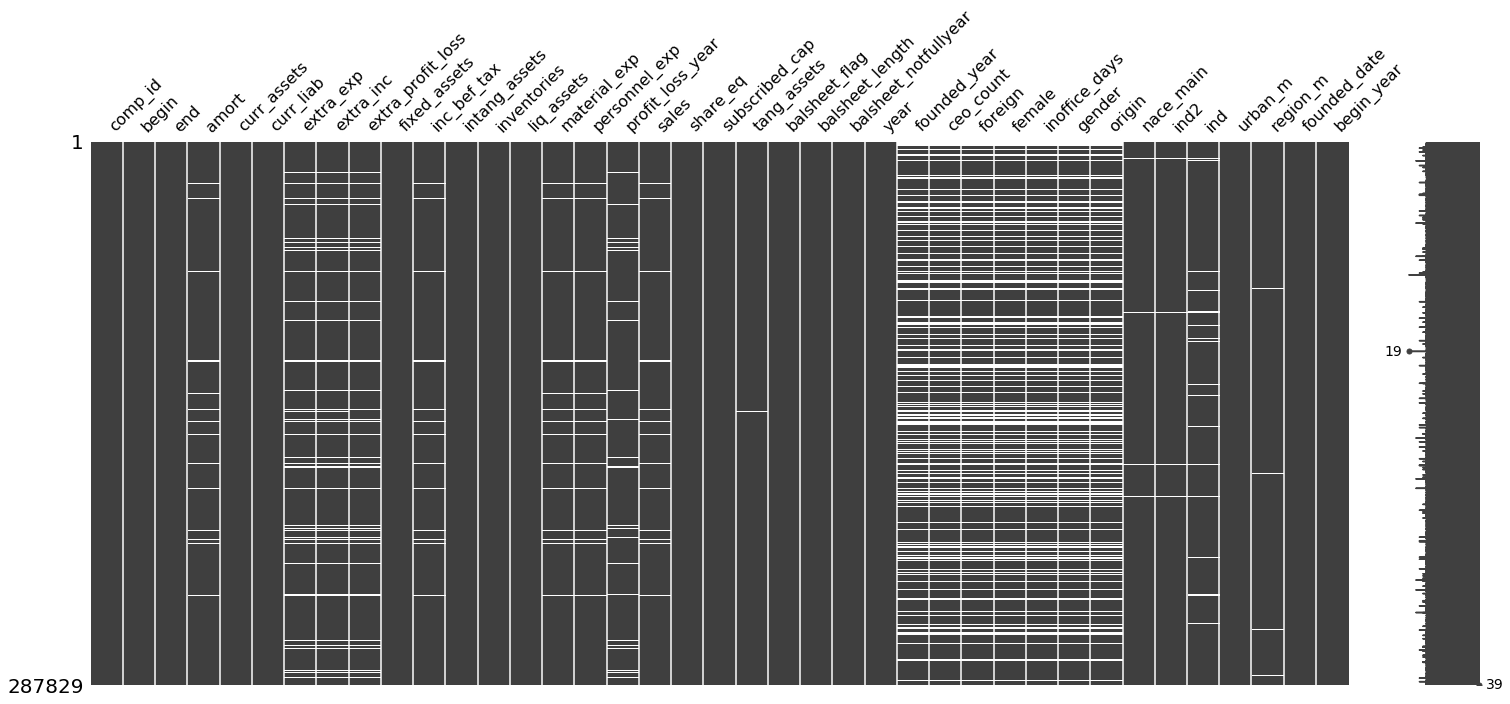

In [15]:
msgno.matrix(df)

Checking for missing data on a yearly basis. This will help me to decide on which years should I choose for my analysis. Obviously I will choose the years having the less missing data.

In [16]:
for year in begin_years_cols:
    my_df = df.query("begin_year == @year")
    missing_perc = my_df.isna().sum().sum()
    print(year, missing_perc)

2005 55975
2006 74511
2007 68832
2008 58408
2009 48308
2010 41216
2011 38533
2012 31849
2013 26077
2014 15437
2015 13099
2016 41176


As per the table above I will work with the years 2013, 2014 and 2015.

In [17]:
df = df.query("begin_year>=2013 and begin_year<=2015")

Taking a look at the dataframe.

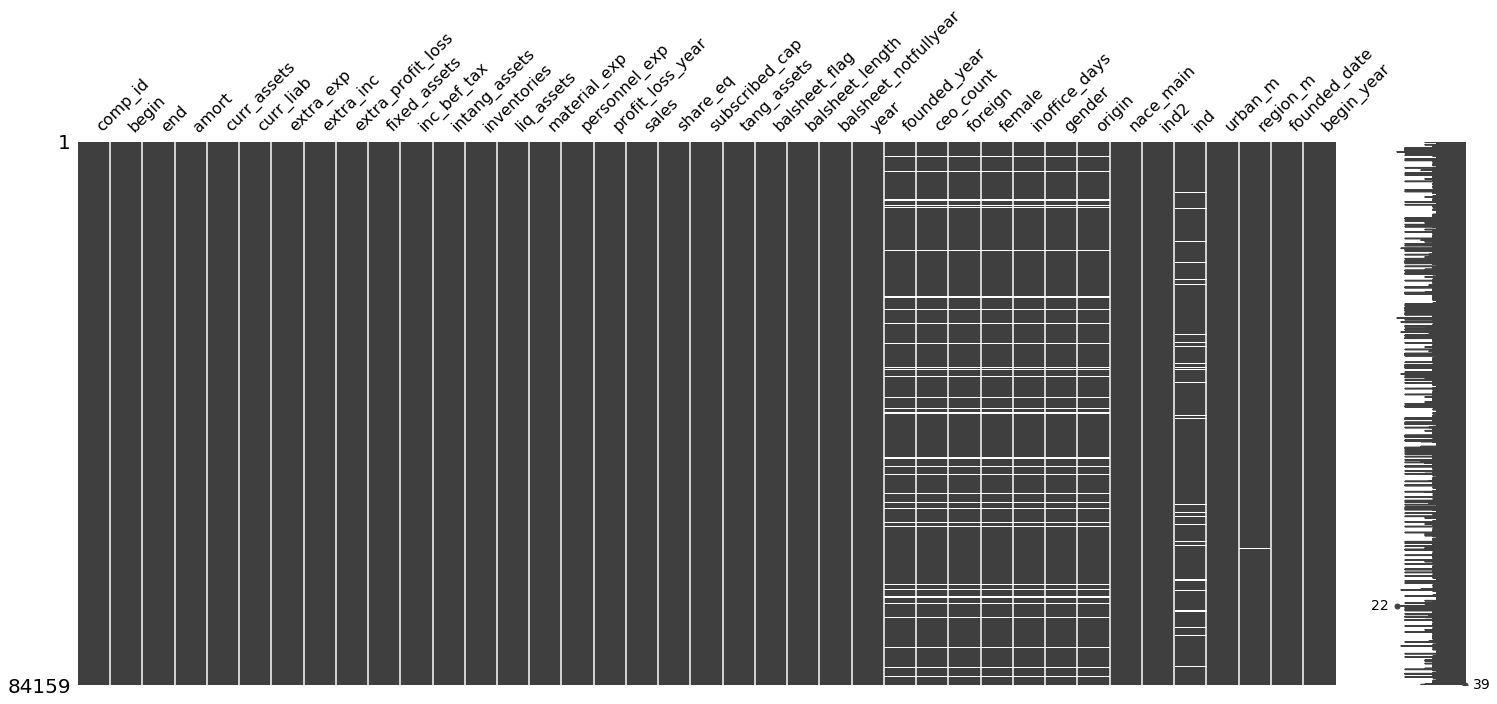

In [18]:
msgno.matrix(df)

In [19]:
missing_cols = df.query("amort.isnull()", engine="python").groupby("comp_id").mean()
missing_cols

,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,...,founded_year,ceo_count,foreign,female,inoffice_days,nace_main,ind2,ind,urban_m,begin_year
comp_id,,,,,,,,,,,,,,,,,,,,,
1.263652e+06,NaN,0.000000e+00,59.259258,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,5610.0,56.0,3.0,1.0,2014.0
1.684924e+07,NaN,1.315942e+06,446049.385417,4870.370443,13408.642553,8538.271459,411479.010417,128454.317546,0.0,288822.218750,...,NaN,NaN,NaN,NaN,NaN,2825.0,28.0,2.0,3.0,2014.0
2.630451e+07,NaN,1.844444e+03,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,...,2011.0,1.0,0.0,0.0,1086.0,5610.0,56.0,3.0,2.0,2013.0
4.070294e+07,NaN,0.000000e+00,20825.925781,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,...,1995.0,1.0,0.0,1.0,3609.0,5520.0,55.0,3.0,3.0,2013.5
5.783932e+07,NaN,1.377778e+03,0.000000,0.000000,0.000000,0.000000,1948.148193,0.000000,0.0,0.000000,...,1991.0,3.0,1.0,0.0,9133.0,5510.0,55.0,3.0,1.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.511119e+11,NaN,1.111111e+04,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,...,2013.0,1.0,0.0,0.0,1122.0,5610.0,56.0,3.0,3.0,2013.0
4.579614e+11,NaN,3.703704e+02,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,...,1994.0,1.0,0.0,0.0,1798.0,3312.0,33.0,2.0,2.0,2013.0
4.599561e+11,NaN,1.111111e+04,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.000000,...,2013.0,1.0,0.0,0.0,1202.0,5610.0,56.0,3.0,2.0,2013.0


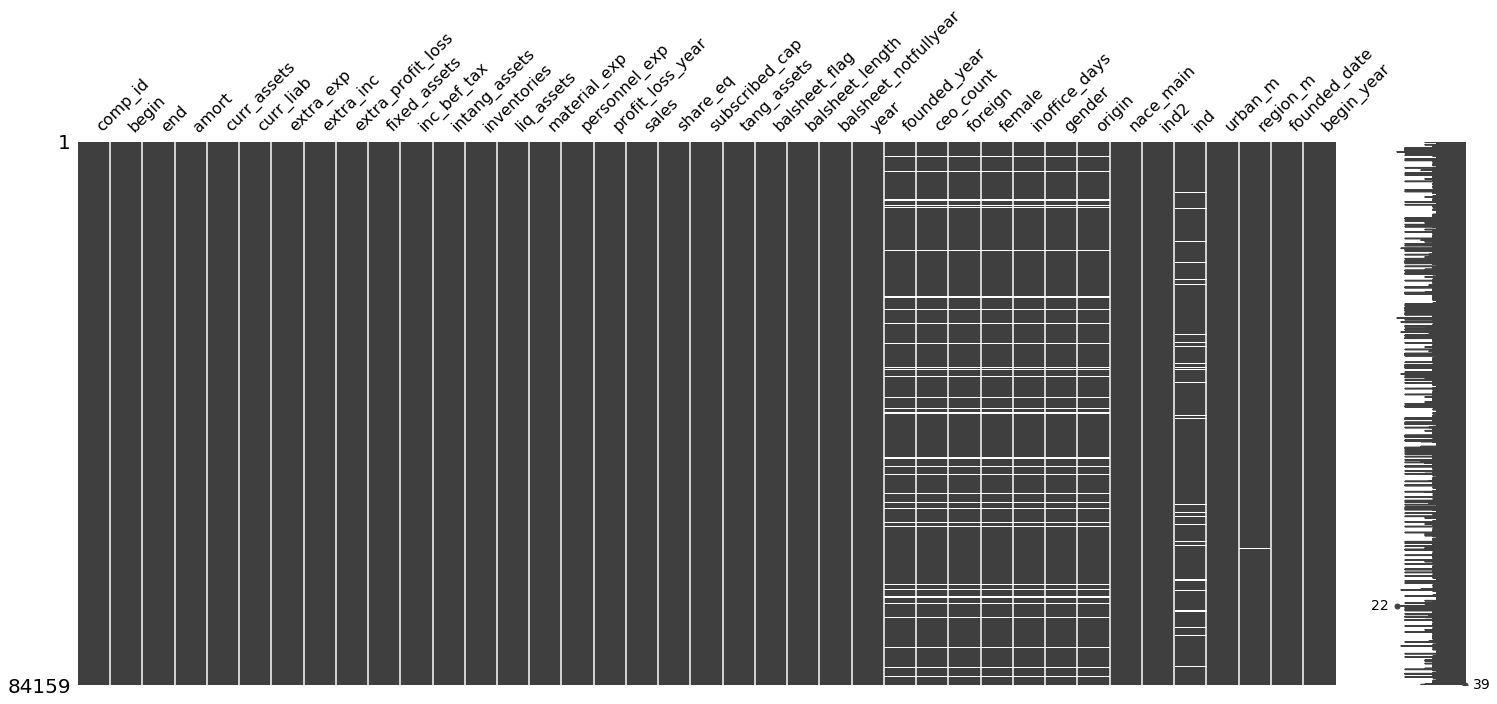

In [20]:
msgno.matrix(df)

As we can see there are 632 companies which do not have amortization data in the dataset.

In [21]:
df.comp_id.nunique()

32365

As there are 32365 different companies in our dataset I will get rid of the 632 companies without amortization data.

In [22]:
df.dropna(subset=["amort"], inplace=True)

In the following few lines I will be deleting all those observations where there is a missing value.

In [23]:
clean_df = df.dropna(subset=["foreign"])

In [24]:
clean_df = clean_df.dropna(subset=["curr_assets"])

In [25]:
clean_df = clean_df.dropna(subset=["ind"])

In [26]:
clean_df = clean_df.dropna(subset=["region_m"])

In [27]:
clean_df.dropna(inplace=True)

As a next step I will make sure that there are only companies in the dataset which have values for each year. Those companies which do not have data for all the years will be deleted.

In [28]:
comp_del_list = list((set(clean_df.query("begin_year==2013")['comp_id']).symmetric_difference(set(clean_df.query("begin_year==2014")['comp_id']))))

In [29]:
for company_id in comp_del_list:
    clean_df = clean_df.query("comp_id!=@company_id")

In [30]:
set(clean_df.query("begin_year==2013")['comp_id']).symmetric_difference(set(clean_df.query("begin_year==2014")['comp_id']))

set()

In [31]:
comp_del_list = list(set(clean_df.query("begin_year==2014")['comp_id']).symmetric_difference(set(clean_df.query("begin_year==2015")['comp_id'])))

In [32]:
for company_id in comp_del_list:
    clean_df = clean_df.query("comp_id!=@company_id")

In [33]:
set(clean_df.query("begin_year==2013")['comp_id']).symmetric_difference(set(clean_df.query("begin_year==2014")['comp_id']))

set()

And now I check if the same amount of observations (companies) are present for every year.

In [34]:
clean_df.query("begin_year==2013")['comp_id'].nunique()

19787

In [35]:
clean_df.query("begin_year==2014")['comp_id'].nunique()

19787

In [36]:
clean_df.query("begin_year==2015")['comp_id'].nunique()

19787

In [37]:
clean_df.comp_id.nunique()

19787

As a next step I will hot encode all those columns (region, urban, gender, origin and industry 1 and industry 2) which have categorical data.

In [39]:
clean_df.region_m.unique()

array(['Central', 'East', 'West'], dtype=object)

In [40]:
clean_df = pd.get_dummies(clean_df, columns=["region_m"], prefix=["region_m"], drop_first=True) 

In [41]:
clean_df.urban_m.unique()

array([1, 3, 2], dtype=int64)

In [42]:
clean_df = pd.get_dummies(clean_df, columns=["urban_m"], prefix=["urban_m"], drop_first=True) 

In [43]:
clean_df.nace_main.unique()

array([5630., 5610., 2711., 5510., 2920., 2732., 5629., 3020., 2899.,
       2740., 3320., 3312., 5520., 5590., 2821., 2932., 2829., 2830.,
       2651., 2822., 2825., 3011., 2620., 2670., 5530., 3314., 3030.,
       2893., 2712., 2811., 2611., 2841., 2790., 2660., 2813., 2814.,
       2823., 3313., 2612., 2630., 3316., 3092., 2894., 2849., 2931.,
       2733., 2892., 3315., 2640., 2812., 3319., 5621., 2815., 2891.,
       2751., 2824., 3091., 2895., 2896., 2752., 2652., 2910., 3012.,
       3317., 2731., 2720., 3099., 3311., 2840., 2680.])

In [44]:
clean_df.gender.unique()

array(['mix', 'male', 'female'], dtype=object)

In [45]:
clean_df = pd.get_dummies(clean_df, columns=["gender"], prefix=["gender"], drop_first=True)

In [46]:
clean_df.origin.unique()

array(['Domestic', 'Foreign', 'mix'], dtype=object)

In [47]:
clean_df = pd.get_dummies(clean_df, columns=["origin"], prefix=["origin"], drop_first=True)

In [48]:
clean_df.ind.unique()

array([3., 2., 1.])

In [49]:
clean_df = pd.get_dummies(clean_df, columns=["ind"], prefix=["ind"], drop_first=True)

In [50]:
clean_df.ind2.unique()

array([56., 27., 55., 29., 30., 28., 33., 26.])

In [51]:
clean_df = pd.get_dummies(clean_df, columns=["ind2"], prefix=["ind2"], drop_first=True)

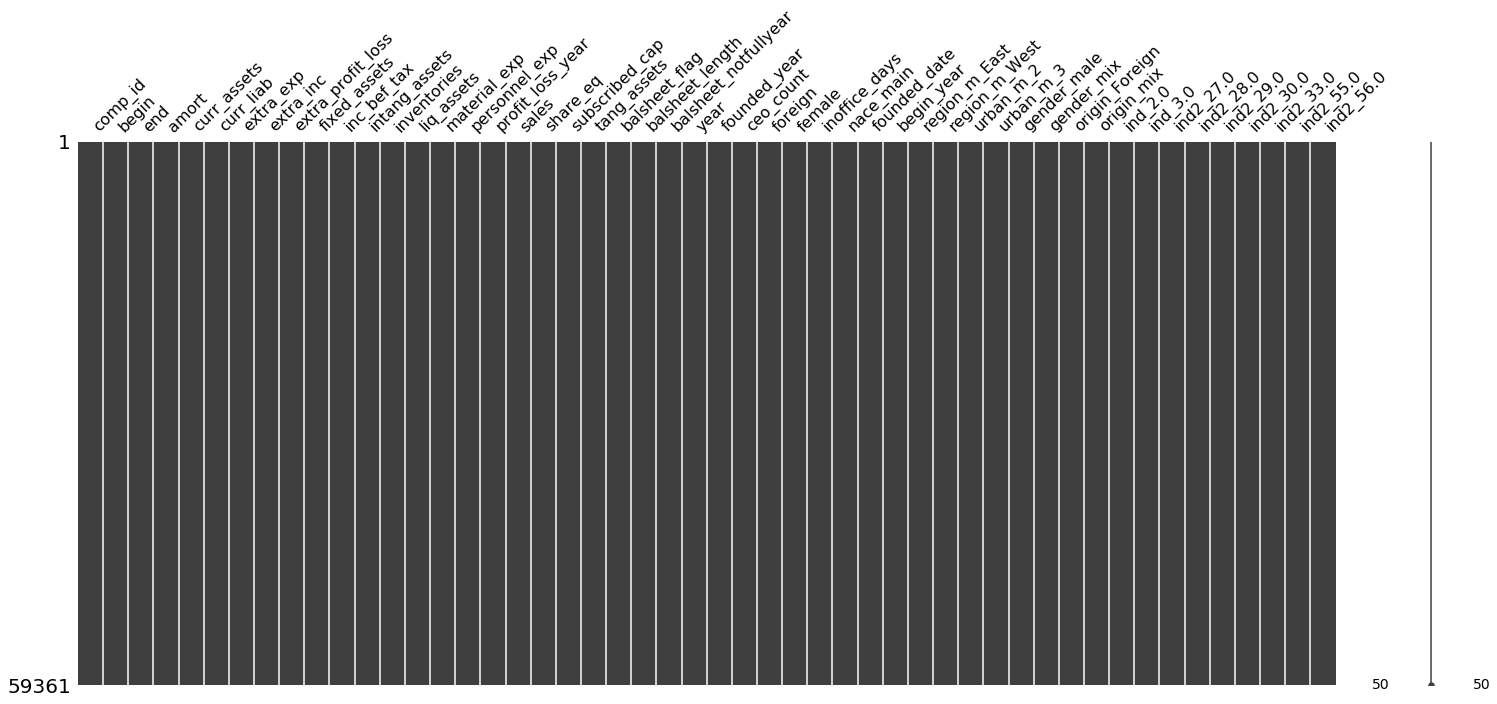

In [52]:
msgno.matrix(clean_df)

In [53]:
clean_df.nace_main.unique()

array([5630., 5610., 2711., 5510., 2920., 2732., 5629., 3020., 2899.,
       2740., 3320., 3312., 5520., 5590., 2821., 2932., 2829., 2830.,
       2651., 2822., 2825., 3011., 2620., 2670., 5530., 3314., 3030.,
       2893., 2712., 2811., 2611., 2841., 2790., 2660., 2813., 2814.,
       2823., 3313., 2612., 2630., 3316., 3092., 2894., 2849., 2931.,
       2733., 2892., 3315., 2640., 2812., 3319., 5621., 2815., 2891.,
       2751., 2824., 3091., 2895., 2896., 2752., 2652., 2910., 3012.,
       3317., 2731., 2720., 3099., 3311., 2840., 2680.])

I will preserve only the first two characters of the nace_main code.

In [62]:
clean_df.nace_main = clean_df.nace_main.apply(lambda x: str(x)[:2])

In [64]:
clean_df = pd.get_dummies(clean_df, columns=["nace_main"], prefix=["nace"], drop_first=True)

In [65]:
clean_df.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,ind2_33.0,ind2_55.0,ind2_56.0,nace_27,nace_28,nace_29,nace_30,nace_33,nace_55,nace_56
8,1001034.0,2013-01-01 00:01:00,2013-01-31 00:12:00,140.740738,140.740738,21851.851562,0.0,0.000000,0.000000,200.000000,...,0,0,1,0,0,0,0,0,0,1
9,1001034.0,2014-01-01 00:01:00,2014-01-31 00:12:00,29.629629,144.444443,22340.740234,0.0,0.000000,0.000000,170.370377,...,0,0,1,0,0,0,0,0,0,1
10,1001034.0,2015-01-01 00:01:00,2015-01-31 00:12:00,3.703704,140.740738,22888.888672,0.0,0.000000,0.000000,166.666672,...,0,0,1,0,0,0,0,0,0,1
15,1001541.0,2013-01-01 00:01:00,2013-01-31 00:12:00,2292.592529,4811.111328,925.925903,0.0,74.074074,74.074074,188274.078125,...,0,0,1,0,0,0,0,0,0,1
16,1001541.0,2014-01-01 00:01:00,2014-01-31 00:12:00,2292.592529,6500.000000,296.296295,0.0,0.000000,0.000000,185981.484375,...,0,0,1,0,0,0,0,0,0,1


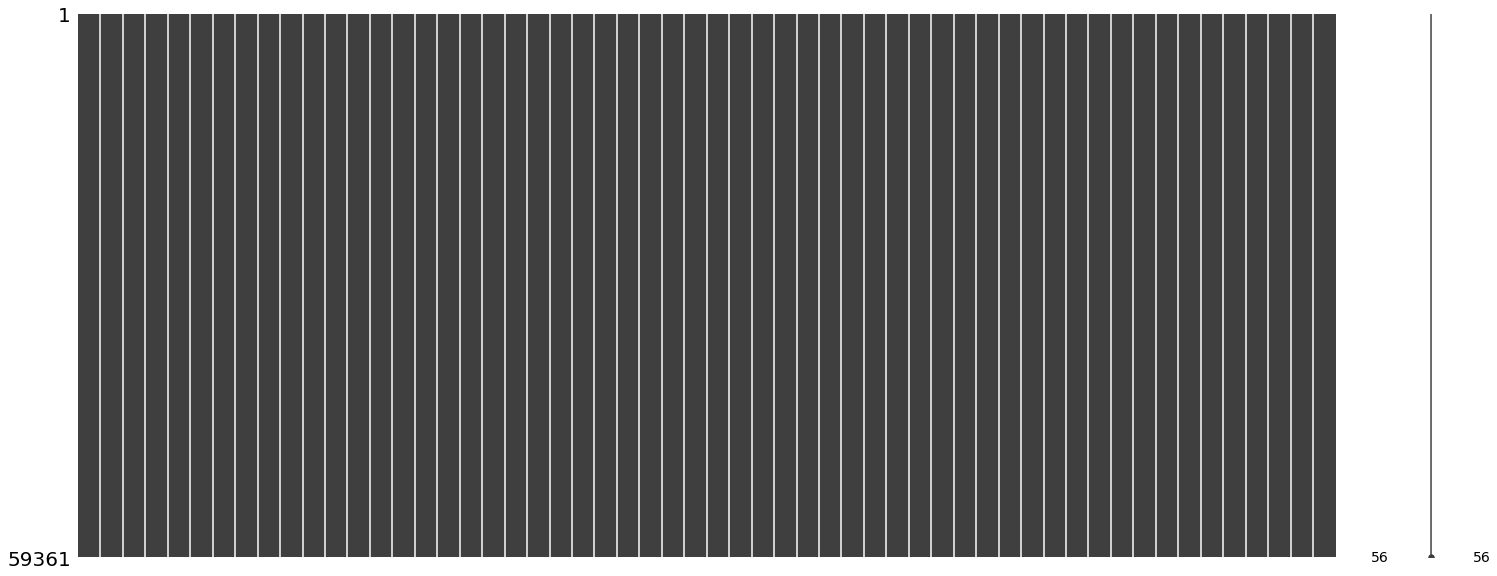

In [66]:
msgno.matrix(clean_df)

LOADING

In [2]:
#os.chdir("C:\\Lori\\Suli\\Szemeszter_2\\Data_Analysis_3\\DA3-A2-BISNODE")
os.chdir("c:\\Lori\\Data_analysis_3")
clean_df=pd.read_csv("clean_df.csv")

***

I will be deleting the foundation date as I already have the information in the founded year.

In [3]:
del clean_df["founded_date"]

I will be creating some new features which is based on liability/equity ratio and the asset/liability ratio.

In [4]:
clean_df["liability_equity_ratio"] = clean_df['curr_liab']/clean_df['share_eq']
clean_df["asset_liability_ratio"] = clean_df['curr_assets'] / clean_df['curr_liab']

As a target variable I will choose a binary variable which shows if a company reached a sales increase over a certain percentage. The actual value I will determine only when I am able to see how the companies in the dataset are performing. Therefore in the next few lines I will add a new variable called 'sales_change_percentage'. This variable will show the increase/decrease in sales between the first and the last year of the dataset, namely 2013-2015.

In [5]:
clean_df.sort_values(['comp_id', 'year'], inplace=True)

In [6]:
clean_df['sales_change_percentage'] = clean_df.groupby('comp_id')['sales'].pct_change(periods=2)

In [7]:
selected_cols = ['comp_id','sales', 'sales_change_percentage']

In [8]:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

In [9]:
clean_df['sales_change_percentage'] = clean_df['sales_change_percentage']+1

There are 742 infinite values after calculating sales changes in two years. These might happen because there are changes from 0 values which could be infinite.
As there are around 19.700 companies in the dataset I will delete these companies.

In [10]:
inf_comps=[]
def collect_inf_companies(row):
    if np.isinf(row['sales_change_percentage'])==True:
        inf_comps.append(row["comp_id"])

In [11]:
clean_df.apply(collect_inf_companies, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
59356    None
59357    None
59358    None
59359    None
59360    None
Length: 59361, dtype: object

In [12]:
for comp_name in inf_comps:
    clean_df = clean_df.query("comp_id!=@comp_name")

In [13]:
np.isinf(clean_df['sales_change_percentage']).sum()

0

The next step is a rather complex step. I will create two datasets from my main dataset. This is because I will feature engineer the data within these two datasets differently. After I feature engineered them I will reunite them.
In the first step I will create the first dataset where I will calculate the percentage changes between the years and then create a wide format table from the long format as I will be needing one company per one line.

In the second step I will create the second dataset where I will calculate the mean values for the features.
Of course in a real world project calculating mean might not be enough, maybe maximum, minimum, standard deviation values would also add to the model. But as my time is reduced I will calculate only the mean of the features.

In my last step I will rejoin both datasets, so I will get a wide table containing the percentage changes of the features over the years and the mean value of the features as well.


In [90]:
test=clean_df.copy()

In [91]:
cols=["amort", "curr_assets", "curr_liab", "extra_exp", "extra_inc", "extra_profit_loss", "fixed_assets", "inc_bef_tax", \
      "intang_assets", "inventories", "liq_assets", "material_exp", "personnel_exp", "profit_loss_year", "sales", "share_eq",\
      "subscribed_cap", "tang_assets", "balsheet_notfullyear"]

counter=0

for col_name in cols:
    counter +=1
    
    period=2
    first_col_name= col_name + "_change_" + str(period)
    test[first_col_name] = test.groupby("comp_id")[col_name].pct_change(periods=period)+1
    
    period=1
    second_col_name= col_name + "_change_over_years"
    test[second_col_name] = test.groupby("comp_id")[col_name].pct_change(periods=period)+1
    
    new_df_name_1 = col_name + "_df_1"
    new_df_name_1 = test.groupby("comp_id")[first_col_name].apply(list).apply(pd.Series).rename(columns=lambda x: first_col_name+'_{}'.format(x+1))
    
    new_df_name_2 = col_name + "_df_2"
    new_df_name_2 = test.groupby("comp_id")[second_col_name].apply(list).apply(pd.Series).rename(columns=lambda x: second_col_name+'_{}'.format(x+1))
    
    if counter==1:
        final_df_1 = pd.merge(new_df_name_1, new_df_name_2, left_index=True, right_index=True, how='left')
    else:
        final_df_1=pd.merge(final_df_1,new_df_name_1,left_index=True, right_index=True, how='left')
        final_df_1=pd.merge(final_df_1,new_df_name_2,left_index=True, right_index=True, how='left')
       
   
    
    

In [93]:
final_df.columns

Index(['amort_change_2_3', 'amort_change_over_years_2',
       'amort_change_over_years_3', 'curr_assets_change_2_3',
       'curr_assets_change_over_years_2', 'curr_assets_change_over_years_3',
       'curr_liab_change_2_3', 'curr_liab_change_over_years_2',
       'curr_liab_change_over_years_3', 'extra_exp_change_2_3',
       'extra_exp_change_over_years_2', 'extra_exp_change_over_years_3',
       'extra_inc_change_2_3', 'extra_inc_change_over_years_2',
       'extra_inc_change_over_years_3', 'extra_profit_loss_change_2_3',
       'extra_profit_loss_change_over_years_2',
       'extra_profit_loss_change_over_years_3', 'fixed_assets_change_2_3',
       'fixed_assets_change_over_years_2', 'fixed_assets_change_over_years_3',
       'inc_bef_tax_change_2_3', 'inc_bef_tax_change_over_years_2',
       'inc_bef_tax_change_over_years_3', 'intang_assets_change_2_3',
       'intang_assets_change_over_years_2',
       'intang_assets_change_over_years_3', 'inventories_change_2_3',
       'invent

In [94]:
del final_df['sales_change_2_3']

In [95]:
select_cols = final_df_1.columns

In [96]:
for col_name in select_cols:
    if final_df_1[col_name].isna().all():
        del final_df_1[col_name]

In [97]:
final_df_1.fillna(0, inplace=True)

In [98]:
select_cols = ["balsheet_length", "liability_equity_ratio", "asset_liability_ratio", "extra_profit_loss", "share_eq", "sales",\
               "share_eq", "curr_assets", "curr_liab", "founded_year", "ceo_count", "foreign", "female", "inoffice_days",\
               "begin_year", "region_m_East", "region_m_West", "urban_m_2", "urban_m_3", "gender_male", "gender_mix", \
               "origin_Foreign", "origin_mix", "ind_2.0", "ind_3.0", "nace_27", "ind2_28.0", "ind2_29.0", "nace_30",\
               "nace_33", "nace_55", "nace_56"]

In [99]:
final_df_2 = test.groupby("comp_id")[select_cols].mean()

There are some missing values present in the second dataset for the "liability_equity_ratio", "asset_liability_ratio". I will fill this nan values with 0. Same applies to the infinite values.

In [100]:
final_df_2.replace([np.inf, -np.inf], np.nan,inplace=True)
final_df_2.fillna(0, inplace=True)

Creating a separate dataset for sales in order to have the average of sales only for the first two years (having the third year sales in the mean is kind of a cheating). 

In [101]:
sales=test[["comp_id", "year" ,"sales"]]

In [102]:
sales.year.unique()

array([2013, 2014, 2015], dtype=int64)

In [103]:
sales = sales.query("year!=2015")

In [104]:
sales = sales.groupby("comp_id")["sales"].mean()

In [105]:
del final_df_2["sales"]

In [106]:
final_df_2=pd.merge(final_df_2, sales, left_index=True, right_index=True, how="left")

As both datasets are cleaned it is time to merge them.

In [108]:
final_df = pd.merge(final_df_1, final_df_2, left_index=True, right_index=True, how="left")

In [109]:
final_df.shape

(19046, 89)

Examining the target variable.

In [111]:
final_df["sales_change_2_3"].describe()

count    19,046.000
mean         12.452
std         988.208
min          -4.981
25%           0.395
50%           1.031
75%           1.430
max     129,887.004
Name: sales_change_2_3, dtype: float64

There are some really extreme values so I will set the maximum growth to 250%. The boolean target variable will be one if the sales change percentage is equal or bigger than 108%.


In [112]:
final_df["sales_change_2_3"] = final_df["sales_change_2_3"].apply(lambda value: 2.5 if value>=2.5 else value)

In [113]:
def create_boolean_var(value):
    if value>=1.08:
        return 1
    else:
        return 0
    

In [115]:
final_df["is_growth_over_8_perc"] = final_df["sales_change_2_3"].apply(create_boolean_var)

In [134]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [136]:
final_df.fillna(0,inplace=True)

***

**Creating the probability models**

In [197]:
train_test, holdout = train_test_split(final_df, test_size=0.2, random_state=42)

In [246]:
X = train_test.drop(columns=["is_growth_over_8_perc","sales_change_2_3"])
y=train_test["is_growth_over_8_perc"]

In [235]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegressionCV, Lasso, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


In [247]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

**Logistic regressor with 5 CV**

In [202]:
logreg=LogisticRegressionCV(cv=5)
logreg.fit(X_train,y_train)

log_pred = logreg.predict(X_test)



C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [203]:
confusion_matrix(y_test, log_pred)

array([[1617,   35],
       [1321,   75]], dtype=int64)

In [204]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.55      0.98      0.70      1652
           1       0.68      0.05      0.10      1396

    accuracy                           0.56      3048
   macro avg       0.62      0.52      0.40      3048
weighted avg       0.61      0.56      0.43      3048



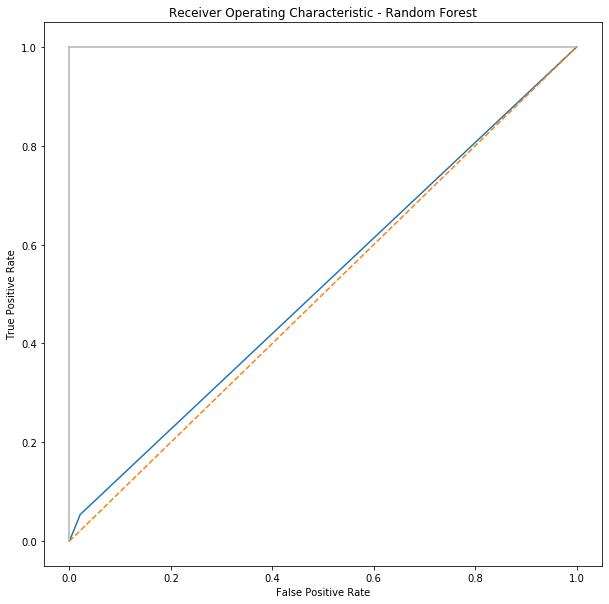

In [205]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, log_pred)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [333]:
roc_auc_score(y_test, log_pred)

0.5162692438443981

In [334]:
crossval_scores = cross_val_score(logreg, X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5617519277357041

Predicting the probabilities with the logistic regressor model

In [227]:
log_pred_proba = logreg.predict_proba(X_test)
log_pred_proba

array([[0.52631375, 0.47368625],
       [0.60006914, 0.39993086],
       [0.52518697, 0.47481303],
       ...,
       [0.58757   , 0.41243   ],
       [0.58490782, 0.41509218],
       [0.51908212, 0.48091788]])

**Ridge Classifier**

In [248]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)


confusion_matrix(y_test, ridge_pred)

C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37785e-18): result may not be accurate.
  overwrite_a=True).T


array([[1420,  232],
       [1022,  374]], dtype=int64)

In [250]:
print(classification_report(y_test, ridge_pred))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69      1652
           1       0.62      0.27      0.37      1396

    accuracy                           0.59      3048
   macro avg       0.60      0.56      0.53      3048
weighted avg       0.60      0.59      0.55      3048



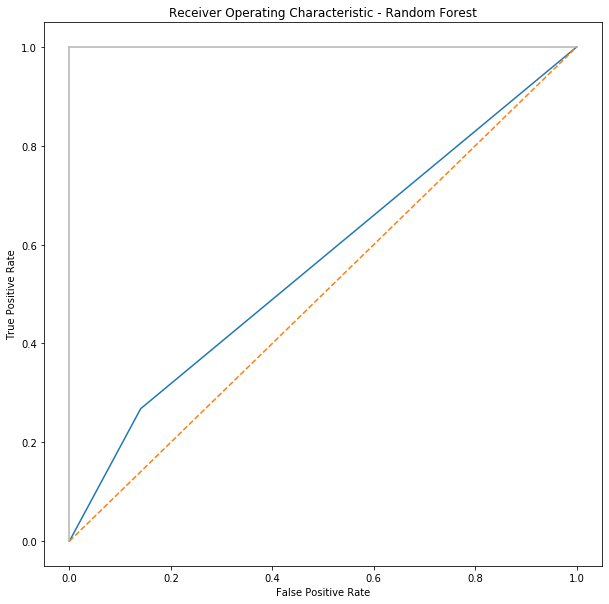

In [251]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, ridge_pred)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [253]:
roc_auc_score(y_test, ridge_pred)

0.5637362370522488

In [254]:
crossval_scores = cross_val_score(ridge, X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44881e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52572e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71306e-18): result may not be accurate.
  overwrite_a=True).T


0.6089148006453344

**Random Forest classifier - vanilla**

Training the random forest classifier

In [229]:
rnd_class=RandomForestClassifier()

rnd_class.fit(X_train,y_train)

rnd_pred = rnd_class.predict(X_test)

C:\Users\Pali\.conda\envs\egis_base_2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Taking a look at the confusion matrix and classification report of the Random Forest model

In [230]:
confusion_matrix(y_test, rnd_pred)

array([[1550,  102],
       [ 167, 1229]], dtype=int64)

In [231]:
print(classification_report(y_test, rnd_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1652
           1       0.92      0.88      0.90      1396

    accuracy                           0.91      3048
   macro avg       0.91      0.91      0.91      3048
weighted avg       0.91      0.91      0.91      3048



Showing the ROC curve for the random forest classifier on the test dataset

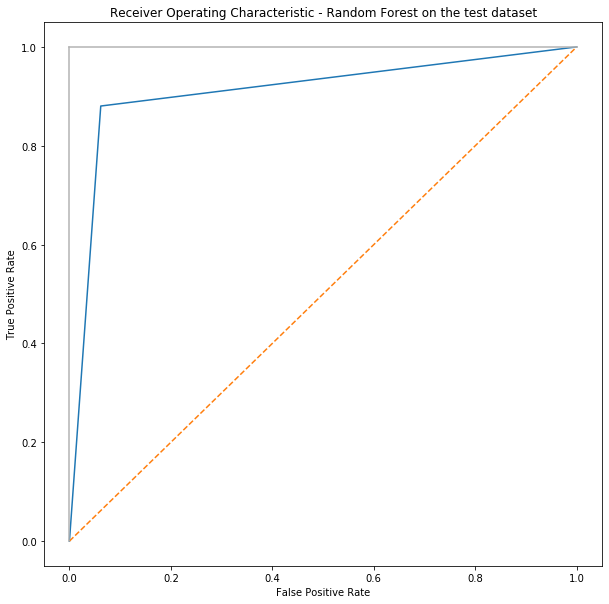

In [232]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, rnd_pred, drop_intermediate=False)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest on the test dataset')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Printing out the value of the area under the curve

In [212]:
roc_auc_score(y_test, rnd_pred)

0.9106917377217508

Cross validated (5 fold) area under the curve value

In [234]:
crossval_scores = cross_val_score(rnd_class, X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

0.9728272555454953

Printing out the probabilities of the random forest classifier on the test dataset

In [216]:
rnd_class.predict_proba(X_test)

array([[0.1, 0.9],
       [1. , 0. ],
       [0.4, 0.6],
       ...,
       [0.2, 0.8],
       [0.1, 0.9],
       [1. , 0. ]])

**Gradient Boost classifier - vanilla**

In [261]:
from sklearn.ensemble import GradientBoostingClassifier

In [264]:
gbcm=GradientBoostingClassifier()

gbcm.fit(X_train,y_train)

gbcm_pred = gbcm.predict(X_test)

In [265]:
confusion_matrix(y_test, gbcm_pred)


array([[1607,   45],
       [  51, 1345]], dtype=int64)

In [266]:
print(classification_report(y_test, gbcm_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1652
           1       0.97      0.96      0.97      1396

    accuracy                           0.97      3048
   macro avg       0.97      0.97      0.97      3048
weighted avg       0.97      0.97      0.97      3048



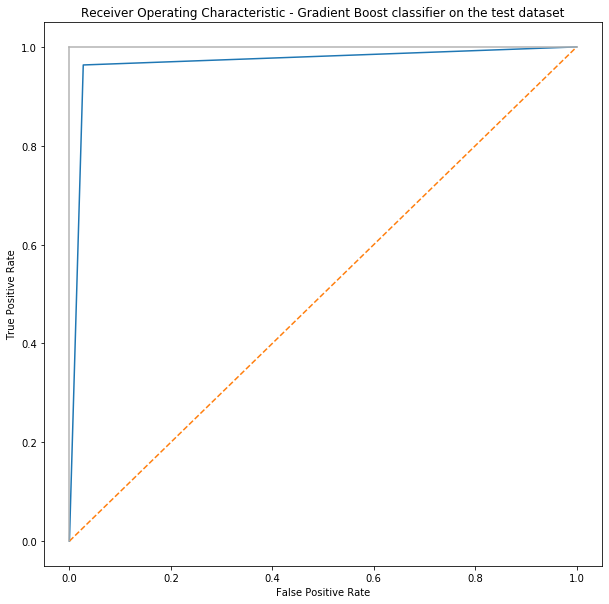

In [268]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, gbcm_pred, drop_intermediate=False)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient Boost classifier on the test dataset')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [270]:
roc_auc_score(y_test, gbcm_pred)

0.9681136696337513

In [272]:
crossval_scores = cross_val_score(gbcm, X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

0.996821299215067

In [273]:
gbcm.predict_proba(X_test)

array([[1.02734768e-03, 9.98972652e-01],
       [9.95962169e-01, 4.03783095e-03],
       [5.19204214e-04, 9.99480796e-01],
       ...,
       [2.60393354e-02, 9.73960665e-01],
       [2.54660601e-02, 9.74533940e-01],
       [9.95591778e-01, 4.40822173e-03]])

**Gradient Boost classifier - optimized**

In [275]:
gbcm=GradientBoostingClassifier(n_estimators=600, learning_rate=0.01, max_depth=5)

gbcm.fit(X_train,y_train)

gbcm_pred = gbcm.predict(X_test)

In [276]:
confusion_matrix(y_test, gbcm_pred)

array([[1624,   28],
       [  40, 1356]], dtype=int64)

In [279]:
print(classification_report(y_test, gbcm_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1652
           1       0.98      0.97      0.98      1396

    accuracy                           0.98      3048
   macro avg       0.98      0.98      0.98      3048
weighted avg       0.98      0.98      0.98      3048



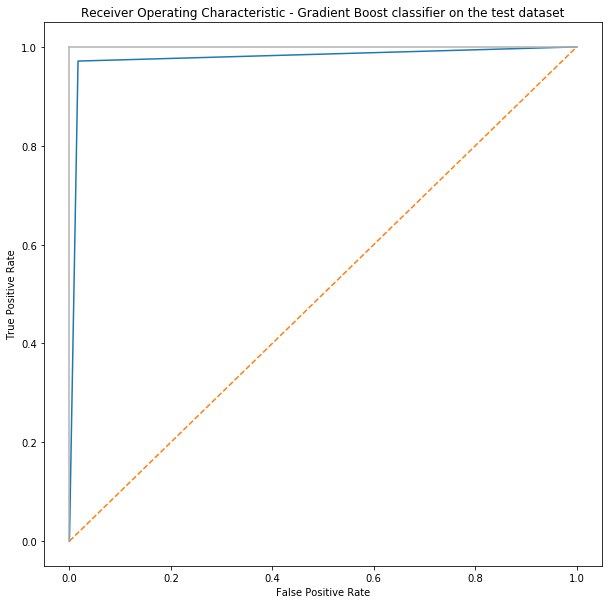

In [280]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, gbcm_pred, drop_intermediate=False)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient Boost classifier on the test dataset')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [281]:
roc_auc_score(y_test, gbcm_pred)

0.9771987761643437

In [282]:
crossval_scores = cross_val_score(gbcm, X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

0.9983180705814684

**GBM on the holdout dataset**

In [285]:
X_ho = holdout.drop(columns=["is_growth_over_8_perc","sales_change_2_3"])
y_ho=holdout["is_growth_over_8_perc"]

In [286]:
gbcm_pred = gbcm.predict(X_ho)


confusion_matrix(y_ho, gbcm_pred)


print(classification_report(y_ho, gbcm_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2066
           1       0.99      0.98      0.98      1744

    accuracy                           0.99      3810
   macro avg       0.99      0.99      0.99      3810
weighted avg       0.99      0.99      0.99      3810



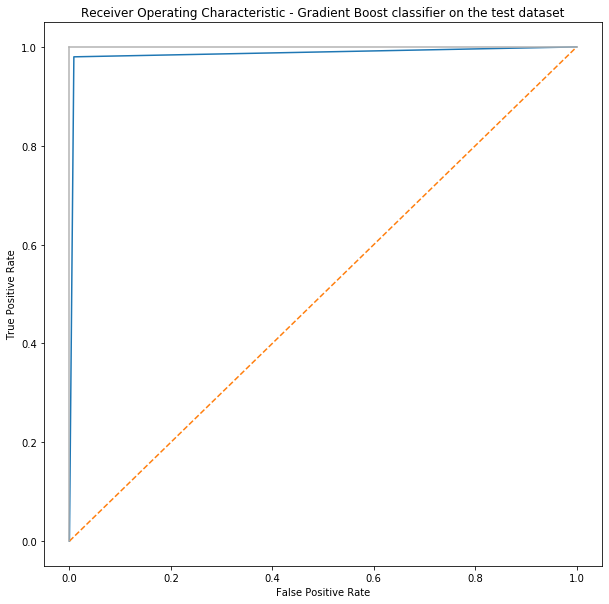

In [287]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_ho, gbcm_pred, drop_intermediate=False)


# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient Boost classifier on the test dataset')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [288]:
roc_auc_score(y_ho, gbcm_pred)

0.9856093523806142

In [289]:
crossval_scores = cross_val_score(gbcm, X_ho, y_ho, scoring='roc_auc', cv=5)
crossval_scores.mean()

0.9963533784862728

In [290]:
gbcm.predict_proba(X_ho)

array([[0.00346789, 0.99653211],
       [0.00260207, 0.99739793],
       [0.00459475, 0.99540525],
       ...,
       [0.99153412, 0.00846588],
       [0.00348782, 0.99651218],
       [0.98247785, 0.01752215]])

**Models comparison**

In [339]:
d = {'model_code': ["M1", "M2", "M3", "M4", "M5"], 'model': ["logistic regression", "ridge classifier", "random forest", "GBM", "optimized GBM"], \
'auc_on_train_test_5_CV': [0.561,0.610, 0.973, 0.997, 0.998]}
model_comp = pd.DataFrame(data=d)
model_comp

,model_code,model,auc_on_train_test_5_CV
0,M1,logistic regression,0.561
1,M2,ridge classifier,0.610
2,M3,random forest,0.973
3,M4,GBM,0.997
4,M5,optimized GBM,0.998


**Optimal classification of the threshold based on the given loss function**

Based on the loss function given in the assignment (E(loss) = Pr(FP) * 10 + Pr(FN) * 2) I calculate at which threshold is this loss function the smallest. For this calculation I use my best model (optimized GBM) and the holdout dataset. 






First I run the threshold optimizer on all the thresholds from 0 to 1.

Then I focused on the thresholds where the loss function was close to its minima. 

In [331]:
gbm_pred_prob = gbcm.predict_proba(X_ho)[:,1]
threshold_list = np.arange(0.5,0.6,0.005)
gbm_new_pred = binarize([gbm_pred_prob], 0.01)[0]

for threshold in threshold_list:
    FN_loss = 2
    FP_loss = 10

    gbm_new_pred = binarize([gbm_pred_prob], threshold)[0]

    confusion_new = confusion_matrix(y_ho, gbm_new_pred)

    N = confusion_new.sum()
    FN = confusion_new[1, 0]
    FP = confusion_new[0, 1] 

    Pr_FN = FN/N
    Pr_FP = FP/N

    loss = Pr_FN*FN_loss + Pr_FP*FP_loss

    auc = roc_auc_score(y_ho, gbm_new_pred)
    
    print("------------")
    print("Threshold: {:.3f}; AUC: {:.3f}; Expected loss is: {:.7f}".format(threshold, auc, loss))

------------
Threshold: 0.500; AUC: 0.986; Expected loss is: 0.0656168
------------
Threshold: 0.505; AUC: 0.986; Expected loss is: 0.0656168
------------
Threshold: 0.510; AUC: 0.986; Expected loss is: 0.0656168
------------
Threshold: 0.515; AUC: 0.987; Expected loss is: 0.0551181
------------
Threshold: 0.520; AUC: 0.987; Expected loss is: 0.0551181
------------
Threshold: 0.525; AUC: 0.987; Expected loss is: 0.0551181
------------
Threshold: 0.530; AUC: 0.987; Expected loss is: 0.0524934
------------
Threshold: 0.535; AUC: 0.987; Expected loss is: 0.0503937
------------
Threshold: 0.540; AUC: 0.987; Expected loss is: 0.0477690
------------
Threshold: 0.545; AUC: 0.987; Expected loss is: 0.0451444
------------
Threshold: 0.550; AUC: 0.987; Expected loss is: 0.0451444
------------
Threshold: 0.555; AUC: 0.987; Expected loss is: 0.0456693
------------
Threshold: 0.560; AUC: 0.987; Expected loss is: 0.0456693
------------
Threshold: 0.565; AUC: 0.986; Expected loss is: 0.0467192
------

As you can see from the above print statements the optimum threshold is at 54.5% and 55% where the loss function is at its lowest point.

***

**Summary & conclusion**

My task was to predict which companies are growing fast and which not. Therefore a I had to build a classification model for this task.

The dataset contained several companies with financial, industrial and management quality data ranging between 2005 and 2016. 
Therefore I choose those subsequent 3 years where there is the most data. 

I set the fast growth for companies which have an overall growth in sales in two years above 8%. This value might seem low but we should not forget that in the years 2013-2015 the economy is just hardly recovering from the 2012 global economic crisis and we are in the midst of the european sovereign crisis. And besides it is my favourite number. :) 



Dataset:
    - 2013 kept all the data (+feature engineered data)
    - 2014 kept all the data (+feature engineered data)
    - 2015 deleted only the year end sales figures, kept every other data  (+feature engineered data)

    
Feature engineering:
    - created new  financial indicator features liability/assets, liability/shareholders equity
    - hot encoded the gender, origin industry, nace, 
    - created new features: changes over one year, change over 2 year for every financial feature
    - created new features: average of the most important financial features
    - created the target variable (continuous): sales change in two years
    - created the target variable (boolean): is sales change in two years >= 8%
        
 I tried different models: logistic regression, ridge classifier, random forest classifier, gbm classifier and from all these the best model I got was the GBM model with optimized features. The results for these models can be seen in the model comparison table I shown earlier. 
 
 The 5 fold cross validated result for the latter model on the holdout set was 99.6% area under the curve. This seems to be a very decent score.
 
 
 I concluded my work with optimising the threshold for my best model with the help of the custom loss function given in the assignment (FP=10, FN=2). I found that the optimal threshold with the given loss function is at 54.5% and 55%.
 
 
 
 